<a href="https://colab.research.google.com/github/Nilavan/Quora-question-pairs/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import random
from fuzzywuzzy import fuzz

In [2]:
df = pd.read_csv('train.csv')
df.fillna('',inplace=True)

# Feature Engineering and Analysis

## Basic Features:
- **freq_qid1** - Frequency of qid1s
- **freq_qid2** - Frequency of qid2s
- **q1len** - Length of question 1
- **q2len** - Length of question 2
- **q1_n_words** - Number of words in question 1
- **q2_n_word**s - Number of words in question 2
- **word_Common** - Number of common words in question 1 and 2
- **word_Total** - Total number of words in question 1 and 2
- **word_Share** - number of common words / total number of words

In [3]:
# https://stackoverflow.com/questions/54541962/how-to-add-calculated-column-to-dataframe-counting-frequency-in-column-in-pandas

df['freq_qid1'] = df.groupby('qid1').qid1.transform('count')
df['freq_qid2'] = df.groupby('qid2').qid2.transform('count')

# https://intellipaat.com/community/42131/python-pandas-find-length-of-string-in-dataframe

df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()

# https://stackoverflow.com/questions/37483470/how-to-calculate-number-of-words-in-a-string-in-dataframe

df['q1_n_words'] = df['question1'].str.split().str.len()
df['q2_n_words'] = df['question2'].str.split().str.len()

In [4]:
def normalized_word_Common(row):
    w1 = set(row['question1'].lower().strip().split())
    w2 = set(row['question2'].lower().strip().split())
    return 1.0*len(w1 & w2)

def normalized_word_Total(row):
    w1 = set(row['question1'].lower().strip().split())
    w2 = set(row['question2'].lower().strip().split())
    return 1.0*(len(w1) + len(w2))

def normalized_word_Share(row):
    w1 = set(row['question1'].lower().strip().split())
    w2 = set(row['question2'].lower().strip().split())
    return 1.0*(len(w1 & w2)/(len(w1) + len(w2)))

In [5]:
df['word_Common'] = df.apply(normalized_word_Common, axis=1)
df['word_Total'] = df.apply(normalized_word_Total, axis=1)
df['word_Share'] = df.apply(normalized_word_Share, axis=1)
df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_Share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


## Analysis of basic features

In [7]:
print('Minimum number of words in question 1: ',min(df['q1_n_words']))
print('Maximum number of words in question 1: ',max(df['q1_n_words']))
print('Minimum number of words in question 2: ',min(df['q2_n_words']))
print('Maximum number of words in question 2: ',max(df['q2_n_words']))
print('Minimum number of total words: ',min(df['word_Total']))
print('Maximum number of total words: ',max(df['word_Total']))
print("Number of question 1s with minimum length:", df[df['q1_n_words']== 0].shape[0])
print("Number of question 2s with minimum length:", df[df['q2_n_words']== 0].shape[0])

Minimum number of words in question 1:  0
Maximum number of words in question 1:  125
Minimum number of words in question 2:  0
Maximum number of words in question 2:  237
Minimum number of total words:  2.0
Maximum number of total words:  166.0
Number of question 1s with minimum length: 1
Number of question 2s with minimum length: 2


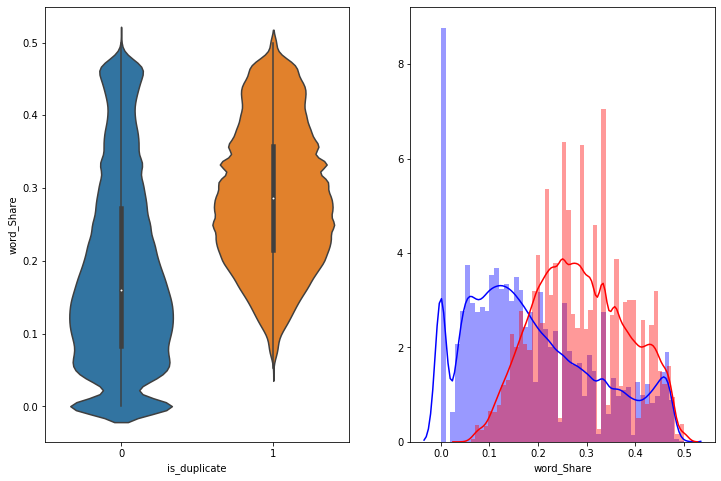

In [8]:
# word share

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.violinplot(x=df['is_duplicate'],y=df['word_Share'])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_Share'],label='0',color='blue')
sns.distplot(df[df['is_duplicate']==1]['word_Share'],label='1',color='red')
plt.show()

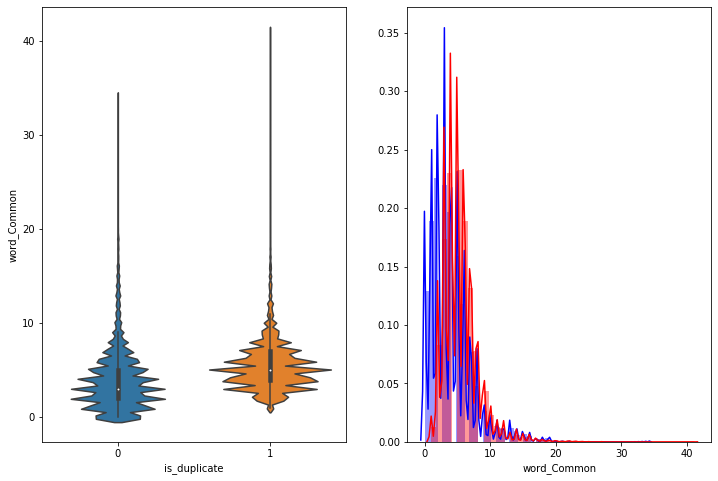

In [9]:
# word share

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.violinplot(x=df['is_duplicate'],y=df['word_Common'])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_Common'],label='0',color='blue')
sns.distplot(df[df['is_duplicate']==1]['word_Common'],label='1',color='red')
plt.show()

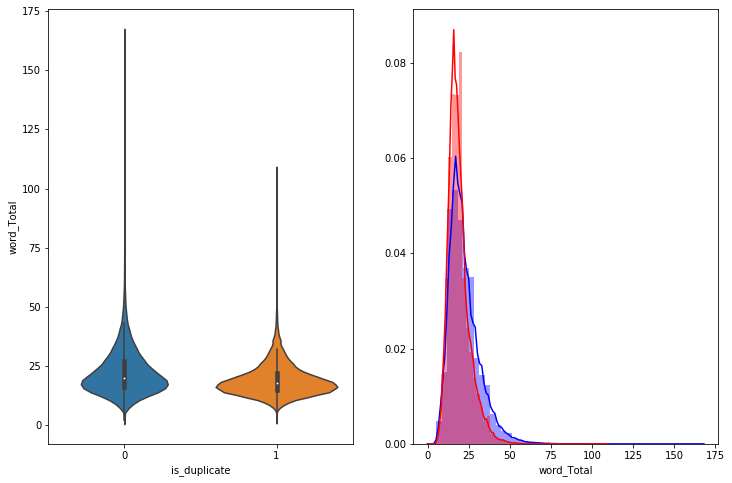

In [10]:
# word share

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.violinplot(x=df['is_duplicate'],y=df['word_Total'])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_Total'],label='0',color='blue')
sns.distplot(df[df['is_duplicate']==1]['word_Total'],label='1',color='red')
plt.show()

## Preprocessing text
- removing html tags
- removing punctuations
- expanding contractions
- stemming, etc.

In [11]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
        .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
        .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
        .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
        .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
        .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
        .replace("€", " euro ").replace("'ll", " will")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    porter = PorterStemmer()
    
    # Pattern for non alphanumeric
    pattern = re.compile('\W')
    
    if type(x)==type(''):
        re.sub(pattern,' ',x)
        
    if type(x)==type(''):
        x=porter.stem(x)
        example1=BeautifulSoup(x)
        x=example1.get_text()
        
    return x    

## Advanced features

In [13]:
def get_token_features(q1,q2):
    token_features = [0.0]*10
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1] = common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2] = common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[3] = common_stop_count/(max(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[4] = common_token_count/(min(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    token_features[5] = common_token_count/(max(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    token_features[6] = int(q1_tokens[-1]==q2_tokens[-1])
    token_features[7] = int(q1_tokens[0]==q2_tokens[0])
    token_features[8] = abs(len(q1_tokens)-len(q2_tokens))
    token_features[9] = (len(q1_tokens)+len(q2_tokens))/2
    
    return token_features

def extract_features(df):
    df['question1'] = df['question1'].apply(preprocess)
    df['question2'] = df['question2'].apply(preprocess)
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
    
    
    

"def extract_features(df):\n    df['question1'] = df['question1'].apply(preprocess)\n    df['question2'] = df['question2'].apply(preprocess)\n    \n    token_features = df[['']]"